In [157]:
print ("Hello World!")

Hello World!


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from dateutil.parser import parse 
import matplotlib as mpl
from sklearn.model_selection import train_test_split


In [159]:
df = pd.read_csv("/Users/ms/Desktop/Boot Camp /3rd Project/Bike-Sharing-Dataset/hour.csv" )

In [160]:
# convert the Temprutre to Celsius , humidity and windspeed  

t_min= -8
t_max=39
t_min_a=16
t_max_a= -50

df['temp'] = df['temp'] * (t_max-t_min) + t_min 
df['atemp'] = df['atemp'] *  (t_max_a-t_min_a) + t_min_a
df['real_hum']= df['hum']*100
df['real_windspeed']= df['windspeed']*67

### **Data Wrangling**

In [161]:
# change column names to sound appropriate

df.rename(columns= {'yr' : 'year' , 'mnth' : 'month', 'hr' : 'hour', 'hum' : 'humidity', 'dteday' : 'date' , 'cnt' : 'count'} , inplace= True) 

In [162]:
# conversion date type from object to timestamp.

df['date'] = pd.to_datetime(df['date'])

In [163]:
# conversion integres attributes to categoricals for proper understanding

#df.loc[df['holiday'] == 0, 'holiday'] = 'No'
#df.loc[df['holiday'] == 1, 'holiday'] = 'Yes'
#df.loc[df['workingday'] == 0, 'workingday'] = 'No'
#df.loc[df['workingday'] == 1, 'workingday'] = 'Yes'
#df.loc[df['season'] == 1, 'season'] = 'Winter'
#df.loc[df['season'] == 2, 'season'] = 'Spring'
#df.loc[df['season'] == 3, 'season'] = 'Summer'
#df.loc[df['season'] == 4, 'season'] = 'Fall'
#df.loc[df['weekday'] == 0, 'weekday'] = 'Sunday'
#df.loc[df['weekday'] == 1, 'weekday'] = 'Monday'
#df.loc[df['weekday'] == 2, 'weekday'] = 'Tuesday'
#df.loc[df['weekday'] == 3, 'weekday'] = 'Wednsday'
#df.loc[df['weekday'] == 4, 'weekday'] = 'Thursday'
#df.loc[df['weekday'] == 5, 'weekday'] = 'Friday'
#df.loc[df['weekday'] == 6, 'weekday'] = 'Saturday'
#df.loc[df['year'] == 0, 'year'] = '2011'
#df.loc[df['year'] == 1, 'year'] = '2012' 

In [164]:
df.rename(columns= {'weekday' : 'day'} , inplace= True) 

In [165]:
# creat a is_weekend column 

df['is_weekend'] = df['day'].apply(lambda x: 1 if x == 'Saturday' else 1 if x == 'Sunday'
 else 0)

df['is_weekend'] = pd.Categorical(df['is_weekend'],categories=[1, 0])


In [166]:
df.head()

,instant,date,season,year,month,hour,holiday,day,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,real_hum,real_windspeed,is_weekend
0,1,2011-01-01,1,0,1,0,0,6,0,1,3.28,-3.0014,0.81,0.0,3,13,16,81.0,0.0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,2.34,-1.9982,0.80,0.0,8,32,40,80.0,0.0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,2.34,-1.9982,0.80,0.0,5,27,32,80.0,0.0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,3.28,-3.0014,0.75,0.0,3,10,13,75.0,0.0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,3.28,-3.0014,0.75,0.0,0,1,1,75.0,0.0,0


In [114]:
df['count'].nsmallest()
df['temp'].nlargest()

13163    39.00
12972    38.06
4768     37.12
4934     37.12
4936     37.12
Name: temp, dtype: float64

## **Split Data**


In [335]:
# split dataset to  X , Y variables, which we gonna model it 


Y = df['count']
X = df['temp']
#X = df[['temp', 'hour', 'real_hum', 'season', 'year', 'windspeed']]

#X = df.drop(['count', 'casual', 'registered', 'date'], axis = 1 )

In [314]:
X.shape

(17379, 6)

In [342]:
# Perform 80/20 Data split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [317]:
# check 

#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

X_train.shape, Y_train.shape

((13903, 6), (13903,))

## **Linear Regression Model**


In [318]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [319]:
# Defines the regression model

model = linear_model.LinearRegression()


In [320]:
# Build training model

model.fit(X_train, Y_train)

LinearRegression()

In [321]:
# Apply trained model to make prediction (on test set)

Y_pred = model.predict(X_test)

## **Prediction results**

In [322]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 6.04827828  7.56869107 -2.04942333 20.24926075 80.08580183 21.11615556]
Intercept: 42.46906796505047
Mean squared error (MSE): 20075.29
Coefficient of determination (R^2): 0.40


In [323]:
r2_score(Y_test, Y_pred)

0.3982572776184965

## **Scatter plots**

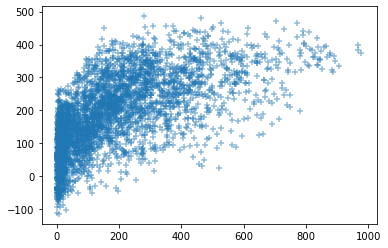

In [324]:
#sns.scatterplot(Y_test, Y_pred, alpha=0.5)
plt.scatter(Y_test, Y_pred, marker="+", alpha=0.5)
#plt.plot(np.linspace(1, 1000, 100), model.predict(np.linspace(-7,39, 100)), 'r')

## **Polyniar Regression Model**


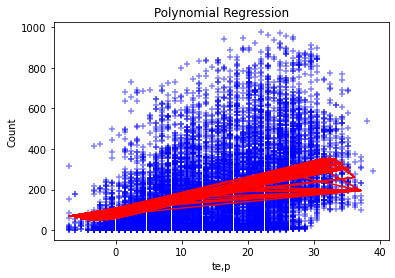

In [361]:
# split dataset to  X , Y variables, which we gonna model it 
y = df['count']
X = df['temp']

# Perform 80/20 Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# reshape 
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

## Fitting Linear Regression to the dataset
#from sklearn.linear_model import LinearRegression

#lin = LinearRegression()
#lin.fit(X_test, y_train)


# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 6)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)







# Visualising the Polynomial Regression results
plt.scatter(X_train, y_train, color = 'blue', marker="+", alpha=0.5)
  
plt.plot(X_test, lin2.predict(poly.fit_transform(X_test)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('te,p')
plt.ylabel('Count')
  
plt.show()



In [369]:
r2_score(Y_test, Y_pred)

0.3982572776184965

In [366]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, Y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('(Linear Regression)')
    plt.xlabel('Temp')
    plt.ylabel('Count')
    plt.show()
    return
viz_polymonial()

ValueError: Expected 2D array, got 1D array instead:
array=[3.28 2.34 2.34 ... 4.22 4.22 4.22].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

RMSE Train: 165.75,  Test: 166.30
R^2 Train: 0.16,  Test: 0.17


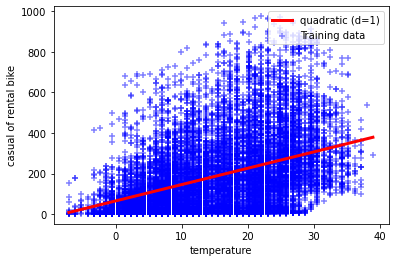

In [373]:
# independent variable
X = df["temp" ] # temperature
# depandent variable
y = df["count"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 1,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
#fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=1)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.xlabel('temperature')
plt.ylabel('casual of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE Train: 134.24,  Test: 135.13
R^2 Train: 0.45,  Test: 0.45


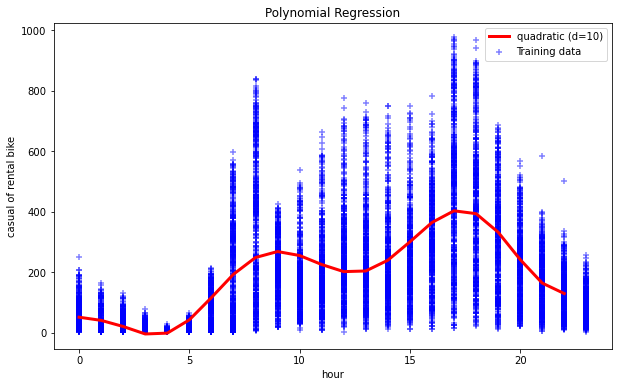

In [412]:
# independent variable
X = df["hour" ] # temperature
# depandent variable
y = df["count"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 10,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=10)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.title('Polynomial Regression')
plt.xlabel('hour')
plt.ylabel('casual of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE Train: 112.48,  Test: 113.01
R^2 Train: 0.45,  Test: 0.45


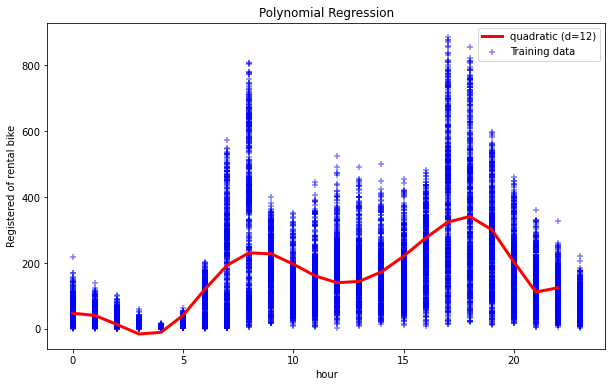

In [406]:
# independent variable
X = df["hour" ] # temperature
# depandent variable
y = df["registered"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 12,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=12)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.title('Polynomial Regression')
plt.xlabel('hour')
plt.ylabel('Registered of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE Train: 40.55,  Test: 42.26
R^2 Train: 0.31,  Test: 0.30


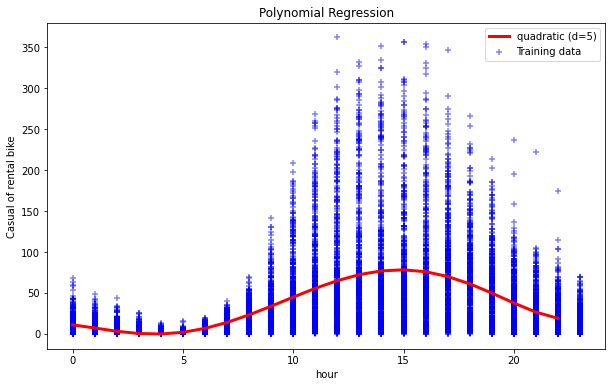

In [426]:
# independent variable
X = df["hour" ] # temperature
# depandent variable
y = df["casual"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 5,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=5)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.title('Polynomial Regression')
plt.xlabel('hour')
plt.ylabel('Casual of rental bike')
plt.legend(loc='upper right')
plt.show()